In [67]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Load CSV file
df = pd.read_csv('retail_sales_dataset.csv')

In [6]:
#view the head of the csv
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [17]:
print(df.columns)

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [38]:
total_sales_amount = df.groupby('Customer ID')['Total Amount'].sum()
total_sales_amount

Customer ID
CUST001     150
CUST002    1000
CUST003      30
CUST004     500
CUST005     100
           ... 
CUST995      30
CUST996      50
CUST997      90
CUST998     100
CUST999     150
Name: Total Amount, Length: 1000, dtype: int64

In [48]:
orders_by_date = df.groupby(['Date','Gender','Age']).size()
orders_by_date

Date        Gender  Age
2023-01-01  Female  40     1
            Male    41     1
                    46     1
2023-01-02  Female  19     1
                    37     1
                          ..
2023-12-29  Female  51     1
            Male    46     1
2023-12-31  Male    60     1
2024-01-01  Male    42     1
                    55     1
Length: 985, dtype: int64

In [56]:
order_by_quantity = df.groupby(['Transaction ID','Product Category','Quantity']).size()
order_by_quantity


Transaction ID  Product Category  Quantity
1               Beauty            3           1
2               Clothing          2           1
3               Electronics       1           1
4               Clothing          1           1
5               Beauty            2           1
                                             ..
996             Clothing          1           1
997             Beauty            3           1
998             Beauty            4           1
999             Electronics       3           1
1000            Electronics       4           1
Length: 1000, dtype: int64

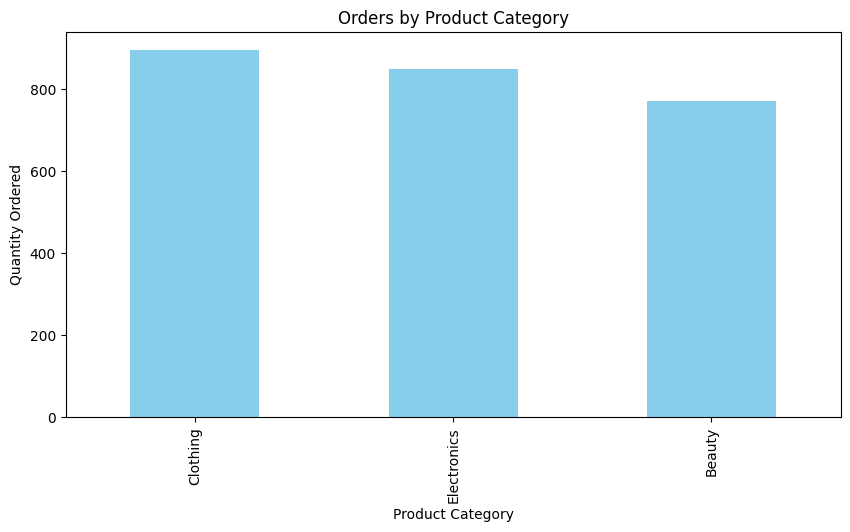

In [91]:
order_by_quantity = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
order_by_quantity.plot(kind='bar', color='skyblue', figsize=(10, 5))

plt.title('Orders by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Ordered')
plt.show()
